In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import autokeras as ak
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [3]:
train['class'].value_counts()

B    114
C     79
A     69
Name: class, dtype: int64

In [4]:
train.columns

Index(['id', 'father', 'mother', 'gender', 'trait', 'SNP_01', 'SNP_02',
       'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
       'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15', 'class'],
      dtype='object')

In [5]:
for idx in range(1,10):
    for i in range(len(train)):
        train.loc[i,f'SNP_0{idx}_x'] = train.loc[i,f'SNP_0{idx}'].split()[0]
        train.loc[i,f'SNP_0{idx}_y'] = train.loc[i,f'SNP_0{idx}'].split()[1]
        train.loc[i,f'SNP_0{idx}_x_y'] = train.loc[i,f'SNP_0{idx}'].split()[1]
        train.loc[i,f'SNP_0{idx}_y_x'] = train.loc[i,f'SNP_0{idx}'].split()[0]
for idx in range(10,16):
    for i in range(len(train)):
        train.loc[i,f'SNP_{idx}_x'] = train.loc[i,f'SNP_{idx}'].split()[0]
        train.loc[i,f'SNP_{idx}_y'] = train.loc[i,f'SNP_{idx}'].split()[1]
        train.loc[i,f'SNP_{idx}_x_y'] = train.loc[i,f'SNP_{idx}'].split()[1]
        train.loc[i,f'SNP_{idx}_y_x'] = train.loc[i,f'SNP_{idx}'].split()[0]

for idx in range(1,10):
    for i in range(len(test)):
        test.loc[i,f'SNP_0{idx}_x'] = test.loc[i,f'SNP_0{idx}'].split()[0]
        test.loc[i,f'SNP_0{idx}_y'] = test.loc[i,f'SNP_0{idx}'].split()[1]
        test.loc[i,f'SNP_0{idx}_x_y'] = test.loc[i,f'SNP_0{idx}'].split()[1]
        test.loc[i,f'SNP_0{idx}_y_x'] = test.loc[i,f'SNP_0{idx}'].split()[0]
for idx in range(10,16):
    for i in range(len(test)):
        test.loc[i,f'SNP_{idx}_x'] = test.loc[i,f'SNP_{idx}'].split()[0]
        test.loc[i,f'SNP_{idx}_y'] = test.loc[i,f'SNP_{idx}'].split()[1]
        test.loc[i,f'SNP_{idx}_x_y'] = test.loc[i,f'SNP_{idx}'].split()[1]
        test.loc[i,f'SNP_{idx}_y_x'] = test.loc[i,f'SNP_{idx}'].split()[0]      

        

# chrom6 = ['SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09']

# for i in range(len(train)):
#     tar = '' 
#     for chrom in chrom6:
#         tar += train.loc[i,chrom]
#     train.loc[i,'chrom6'] = tar

train.columns



Index(['id', 'father', 'mother', 'gender', 'trait', 'SNP_01', 'SNP_02',
       'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
       'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15', 'class',
       'SNP_01_x', 'SNP_01_y', 'SNP_01_x_y', 'SNP_01_y_x', 'SNP_02_x',
       'SNP_02_y', 'SNP_02_x_y', 'SNP_02_y_x', 'SNP_03_x', 'SNP_03_y',
       'SNP_03_x_y', 'SNP_03_y_x', 'SNP_04_x', 'SNP_04_y', 'SNP_04_x_y',
       'SNP_04_y_x', 'SNP_05_x', 'SNP_05_y', 'SNP_05_x_y', 'SNP_05_y_x',
       'SNP_06_x', 'SNP_06_y', 'SNP_06_x_y', 'SNP_06_y_x', 'SNP_07_x',
       'SNP_07_y', 'SNP_07_x_y', 'SNP_07_y_x', 'SNP_08_x', 'SNP_08_y',
       'SNP_08_x_y', 'SNP_08_y_x', 'SNP_09_x', 'SNP_09_y', 'SNP_09_x_y',
       'SNP_09_y_x', 'SNP_10_x', 'SNP_10_y', 'SNP_10_x_y', 'SNP_10_y_x',
       'SNP_11_x', 'SNP_11_y', 'SNP_11_x_y', 'SNP_11_y_x', 'SNP_12_x',
       'SNP_12_y', 'SNP_12_x_y', 'SNP_12_y_x', 'SNP_13_x', 'SNP_13_y',
       'SNP_13_x_y', 'SNP_13_y_x', 'SNP_14_x', 'SNP_14_y'

In [6]:
chrom6 = ['SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09']
chrom9 = ['SNP_12', 'SNP_13', 'SNP_14']

for i in range(len(train)):
    tar = '' 
    for chrom in chrom6:
        tar += train.loc[i,chrom] + ' '
    train.loc[i,'chrom6'] = tar

for i in range(len(train)):
    tar = '' 
    for chrom in chrom9:
        tar += train.loc[i,chrom] + ' '
    train.loc[i,'chrom9'] = tar
    
for i in range(len(test)):
    tar = '' 
    for chrom in chrom6:
        tar += test.loc[i,chrom] + ' '
    test.loc[i,'chrom6'] = tar

for i in range(len(test)):
    tar = '' 
    for chrom in chrom9:
        tar += test.loc[i,chrom] + ' '
    test.loc[i,'chrom9'] = tar
    
# print(train['chrom9'].value_counts())
# print(test['chrom9'].value_counts())

In [7]:
bag = {'ARS' : ['SNP_02','SNP_03', 'SNP_04', 'SNP_09', 'SNP_11'],
       'BTB' : ['SNP_10','SNP_13'],
       'HAP' : ['SNP_07','SNP_12','SNP_14'],
       'BOV' : ['SNP_05','SNP_06','SNP_08','SNP_15']
}

for i in range(len(train)):
    for item in bag:
        tar = ''
        for chrom in bag[item]:
            tar += train.loc[i,chrom] + ' '
        train.loc[i,item] = tar
        
for i in range(len(test)):
    for item in bag:
        tar = ''
        for chrom in bag[item]:
            tar += test.loc[i,chrom] + ' '
        test.loc[i,item] = tar

In [8]:
# # train = train[train['class']!='A']
# # test = test[test['trait']==2]
# le = preprocessing.LabelEncoder()
# tar = ['SNP_01', 'SNP_02',
#        'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
#        'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15',
#       'SNP_01_x', 'SNP_01_y', 'SNP_01_x_y', 'SNP_01_y_x', 'SNP_02_x',
#        'SNP_02_y', 'SNP_02_x_y', 'SNP_02_y_x', 'SNP_03_x', 'SNP_03_y',
#        'SNP_03_x_y', 'SNP_03_y_x', 'SNP_04_x', 'SNP_04_y', 'SNP_04_x_y',
#        'SNP_04_y_x', 'SNP_05_x', 'SNP_05_y', 'SNP_05_x_y', 'SNP_05_y_x',
#        'SNP_06_x', 'SNP_06_y', 'SNP_06_x_y', 'SNP_06_y_x', 'SNP_07_x',
#        'SNP_07_y', 'SNP_07_x_y', 'SNP_07_y_x', 'SNP_08_x', 'SNP_08_y',
#        'SNP_08_x_y', 'SNP_08_y_x', 'SNP_09_x', 'SNP_09_y', 'SNP_09_x_y',
#        'SNP_09_y_x', 'SNP_10_x', 'SNP_10_y', 'SNP_10_x_y', 'SNP_10_y_x',
#        'SNP_11_x', 'SNP_11_y', 'SNP_11_x_y', 'SNP_11_y_x', 'SNP_12_x',
#        'SNP_12_y', 'SNP_12_x_y', 'SNP_12_y_x', 'SNP_13_x', 'SNP_13_y',
#        'SNP_13_x_y', 'SNP_13_y_x', 'SNP_14_x', 'SNP_14_y', 'SNP_14_x_y',
#        'SNP_14_y_x', 'SNP_15_x', 'SNP_15_y', 'SNP_15_x_y', 'SNP_15_y_x','chrom6','chrom9','ARS', 'BTB', 'HAP', 'BOV']
# for col in tar:
#     le.fit(test[col])
#     test[col] = le.transform(test[col])
    
# tar = ['SNP_01', 'SNP_02',
#        'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
#        'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15',
#        'SNP_01_x', 'SNP_01_y', 'SNP_01_x_y', 'SNP_01_y_x', 'SNP_02_x',
#        'SNP_02_y', 'SNP_02_x_y', 'SNP_02_y_x', 'SNP_03_x', 'SNP_03_y',
#        'SNP_03_x_y', 'SNP_03_y_x', 'SNP_04_x', 'SNP_04_y', 'SNP_04_x_y',
#        'SNP_04_y_x', 'SNP_05_x', 'SNP_05_y', 'SNP_05_x_y', 'SNP_05_y_x',
#        'SNP_06_x', 'SNP_06_y', 'SNP_06_x_y', 'SNP_06_y_x', 'SNP_07_x',
#        'SNP_07_y', 'SNP_07_x_y', 'SNP_07_y_x', 'SNP_08_x', 'SNP_08_y',
#        'SNP_08_x_y', 'SNP_08_y_x', 'SNP_09_x', 'SNP_09_y', 'SNP_09_x_y',
#        'SNP_09_y_x', 'SNP_10_x', 'SNP_10_y', 'SNP_10_x_y', 'SNP_10_y_x',
#        'SNP_11_x', 'SNP_11_y', 'SNP_11_x_y', 'SNP_11_y_x', 'SNP_12_x',
#        'SNP_12_y', 'SNP_12_x_y', 'SNP_12_y_x', 'SNP_13_x', 'SNP_13_y',
#        'SNP_13_x_y', 'SNP_13_y_x', 'SNP_14_x', 'SNP_14_y', 'SNP_14_x_y',
#        'SNP_14_y_x', 'SNP_15_x', 'SNP_15_y', 'SNP_15_x_y', 'SNP_15_y_x','chrom6','chrom9','ARS', 'BTB', 'HAP', 'BOV','class']
# for col in tar:
#     le.fit(train[col])
#     train[col] = le.transform(train[col])

In [9]:
tar = ['SNP_01', 'SNP_02',
       'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
       'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15',
      'SNP_01_x', 'SNP_01_y', 'SNP_01_x_y', 'SNP_01_y_x', 'SNP_02_x',
       'SNP_02_y', 'SNP_02_x_y', 'SNP_02_y_x', 'SNP_03_x', 'SNP_03_y',
       'SNP_03_x_y', 'SNP_03_y_x', 'SNP_04_x', 'SNP_04_y', 'SNP_04_x_y',
       'SNP_04_y_x', 'SNP_05_x', 'SNP_05_y', 'SNP_05_x_y', 'SNP_05_y_x',
       'SNP_06_x', 'SNP_06_y', 'SNP_06_x_y', 'SNP_06_y_x', 'SNP_07_x',
       'SNP_07_y', 'SNP_07_x_y', 'SNP_07_y_x', 'SNP_08_x', 'SNP_08_y',
       'SNP_08_x_y', 'SNP_08_y_x', 'SNP_09_x', 'SNP_09_y', 'SNP_09_x_y',
       'SNP_09_y_x', 'SNP_10_x', 'SNP_10_y', 'SNP_10_x_y', 'SNP_10_y_x',
       'SNP_11_x', 'SNP_11_y', 'SNP_11_x_y', 'SNP_11_y_x', 'SNP_12_x',
       'SNP_12_y', 'SNP_12_x_y', 'SNP_12_y_x', 'SNP_13_x', 'SNP_13_y',
       'SNP_13_x_y', 'SNP_13_y_x', 'SNP_14_x', 'SNP_14_y', 'SNP_14_x_y',
       'SNP_14_y_x', 'SNP_15_x', 'SNP_15_y', 'SNP_15_x_y', 'SNP_15_y_x']

tp = []
for col in tar:
    tp.append(list(test[col].value_counts().index))
temp = []
for i in tp:
    temp.extend(i)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(sorted(list(set(temp))))
for col in tar:
    test[col] = le.transform(test[col])
    
tp = []
for col in tar:
    tp.append(list(train[col].value_counts().index))
temp = []
for i in tp:
    temp.extend(i)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(sorted(list(set(temp))))
for col in tar:
    train[col] = le.transform(train[col])

le.fit(train['class'])
train['class'] = le.transform(train['class'])

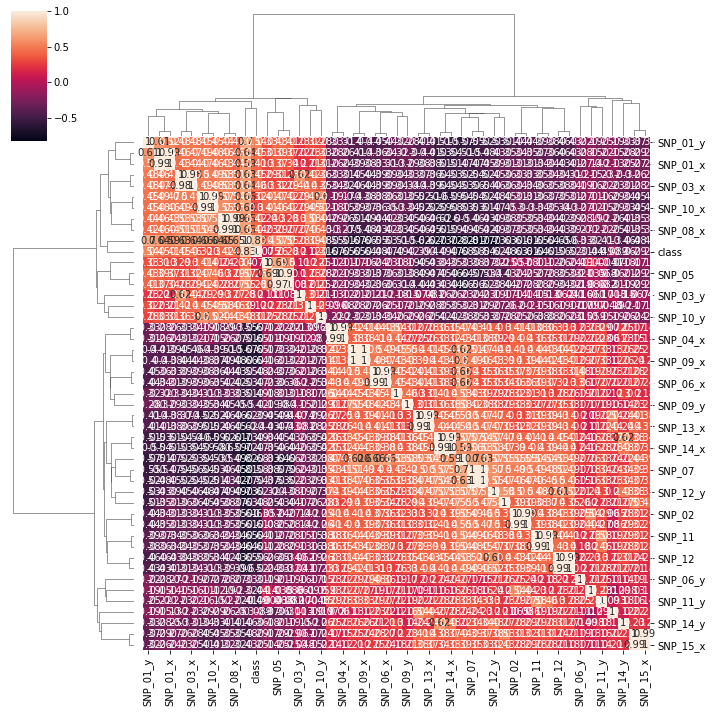

In [10]:
target = ['trait', 'SNP_01', 'SNP_02',
       'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
       'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15',
          'SNP_01_x', 'SNP_01_y', 'SNP_02_x', 'SNP_02_y', 'SNP_03_x', 'SNP_03_y',
       'SNP_04_x', 'SNP_04_y', 'SNP_05_x', 'SNP_05_y', 'SNP_06_x', 'SNP_06_y',
       'SNP_07_x', 'SNP_07_y', 'SNP_08_x', 'SNP_08_y', 'SNP_09_x', 'SNP_09_y',
       'SNP_10_x', 'SNP_10_y', 'SNP_11_x', 'SNP_11_y', 'SNP_12_x', 'SNP_12_y',
       'SNP_13_x', 'SNP_13_y', 'SNP_14_x', 'SNP_14_y', 'SNP_15_x', 'SNP_15_y','chrom6','chrom9','ARS', 'BTB', 'HAP', 'BOV','class']
sns.clustermap(train.loc[:,target].corr(),annot=True)

In [11]:
train.loc[:,target].corr()

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,...,SNP_11_y,SNP_12_x,SNP_12_y,SNP_13_x,SNP_13_y,SNP_14_x,SNP_14_y,SNP_15_x,SNP_15_y,class
trait,1.000000,0.637867,-0.610265,0.627084,-0.546838,0.565840,-0.547257,-0.805817,0.653948,-0.673210,...,-0.407154,-0.603854,-0.734348,-0.623628,-0.297535,-0.717554,-0.457579,-0.426271,-0.628027,0.826978
SNP_01,0.637867,1.000000,-0.342403,0.460177,-0.281975,0.394531,-0.361383,-0.503009,0.456223,-0.414269,...,-0.219049,-0.434410,-0.428630,-0.407654,-0.148884,-0.536740,-0.276397,-0.263082,-0.353046,0.451775
SNP_02,-0.610265,-0.342403,1.000000,-0.326260,0.414877,-0.243039,0.374799,0.487937,-0.352832,0.409707,...,0.289010,0.391419,0.503895,0.315678,0.064550,0.390907,0.282445,0.281256,0.388655,-0.628983
SNP_03,0.627084,0.460177,-0.326260,1.000000,-0.331440,0.307763,-0.391737,-0.542368,0.533892,-0.448017,...,-0.234779,-0.309786,-0.450034,-0.363154,-0.202911,-0.533951,-0.301588,-0.227362,-0.359014,0.445247
SNP_04,-0.546838,-0.281975,0.414877,-0.331440,1.000000,-0.216398,0.441336,0.434393,-0.288727,0.415635,...,0.290006,0.301889,0.399507,0.279348,0.071680,0.353520,0.254028,0.139072,0.303082,-0.668875
SNP_05,0.565840,0.394531,-0.243039,0.307763,-0.216398,1.000000,-0.368948,-0.568097,0.298083,-0.330061,...,-0.068479,-0.327800,-0.400669,-0.474877,-0.359886,-0.463779,-0.207325,-0.246816,-0.430479,0.256079
SNP_06,-0.547257,-0.361383,0.374799,-0.391737,0.441336,-0.368948,1.000000,0.399869,-0.438382,0.497517,...,0.287644,0.310928,0.361045,0.410957,0.225020,0.390271,0.214952,0.250623,0.352445,-0.481538
SNP_07,-0.805817,-0.503009,0.487937,-0.542368,0.434393,-0.568097,0.399869,1.000000,-0.457202,0.510038,...,0.342075,0.485744,0.573365,0.496516,0.241259,0.563461,0.341582,0.348435,0.497864,-0.582567
SNP_08,0.653948,0.456223,-0.352832,0.533892,-0.288727,0.298083,-0.438382,-0.457202,1.000000,-0.505233,...,-0.201636,-0.386153,-0.494024,-0.460538,-0.258867,-0.600783,-0.409682,-0.318968,-0.382179,0.419520
SNP_09,-0.673210,-0.414269,0.409707,-0.448017,0.415635,-0.330061,0.497517,0.510038,-0.505233,1.000000,...,0.328628,0.418659,0.440557,0.408729,0.131526,0.442667,0.262833,0.207507,0.399652,-0.649876


In [12]:
# BOV,SNP_13_y

In [13]:
# # train = pd.read_csv('./train.csv')
# target = ['trait', 'SNP_01', 'SNP_02',
#        'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
#        'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15','class'] # test 내부 컬럼이 모두 사용됬습니다.
# comp4 = train.loc[:,target]
# train4, test4 = train_test_split(comp4, test_size=0.1, random_state=21)
# train4.to_csv(f'./comp_train.csv')
# test4.to_csv(f'./comp_test.csv')

# target = [ 'id','trait','SNP_01', 'SNP_02',
#        'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
#        'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15']
# # test = pd.read_csv('./test.csv')
# tp = test.loc[:,['id']]
# test = test.loc[:,target]
# test = test.drop('id',axis=1)
# test.to_csv('./test_target.csv')

# ###############################################

# clf = ak.StructuredDataClassifier(
#     max_trials=5,  # 10회 생성
#     overwrite=True,
# )
# # 몇가지 옵션요소가 있습니다.
# # https://autokeras.com/

# clf.fit(
#     f'./comp_train.csv', # train path
#     "class", # label
#     epochs=200,
# )

# predicted_y = clf.predict(f'./comp_test.csv') # valid path
# print(clf.evaluate(f'./comp_test.csv', "class"))
# model = clf.export_model()
# pred = model.predict(pd.read_csv('./test_target.csv')) # test path

In [15]:
# train = pd.read_csv('./train.csv')
target = ['trait', 'SNP_01', 'SNP_02',
       'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
       'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15'
          
          ,'class'] # test 내부 컬럼이 모두 사용됬습니다.

comp4 = train.loc[:,target]
# train4, test4 = train_test_split(comp4, test_size=0.1, random_state=21)
comp4.to_csv(f'./comp_train.csv')
# test.to_csv(f'./comp_test.csv')

target = [ 'id','trait','SNP_01', 'SNP_02',
       'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
       'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15',
         ]

# test = pd.read_csv('./test.csv')
tp = test.loc[:,['id']]
test = test.loc[:,target]
test = test.drop('id',axis=1)
test.to_csv('./test_target.csv')

###############################################

clf = ak.StructuredDataClassifier(
    max_trials=5,  # 10회 생성
    overwrite=True,
)
# 몇가지 옵션요소가 있습니다.
# https://autokeras.com/

clf.fit(
    f'./comp_train.csv', # train path
    "class", # label
    epochs=100,
)

# predicted_y = clf.predict(f'./comp_test.csv') # valid path
# print(clf.evaluate(f'./comp_test.csv', "class"))
model = clf.export_model()
pred = model.predict(pd.read_csv('./test_target.csv')) # test path

Trial 5 Complete [00h 00m 08s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 00m 45s
INFO:tensorflow:Oracle triggered exit
Epoch 1/100
9/9 [==============================] - 0s 2ms/step - loss: 1.0886 - accuracy: 0.4695
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.9181 - accuracy: 0.5763
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.7857 - accuracy: 0.6679
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.6764 - accuracy: 0.7710
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.5870 - accuracy: 0.8092
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.5128 - accuracy: 0.8740
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 0.4507 - accuracy: 0.8855
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.3986 - accuracy: 0.9008
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.3

9/9 [==============================] - 0s 1ms/step - loss: 0.0114 - accuracy: 1.0000
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0111 - accuracy: 1.0000
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0107 - accuracy: 1.0000
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0104 - accuracy: 1.0000
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0100 - accuracy: 1.0000
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0097 - accuracy: 1.0000
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0091 - accuracy: 1.0000
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0088 - accuracy: 1.0000
Epoch 92/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0086 - accuracy: 1.0000
Epoch 93/100
9/9 [===============

In [16]:
# print(clf.evaluate(f'./comp_test.csv', "class"))
# model = clf.export_model()
# pred = model.predict(pd.read_csv('./test_target.csv')) # test path

In [17]:
pred

array([[9.98544872e-01, 1.42205670e-03, 3.31115989e-05],
       [3.22125459e-07, 9.99999344e-01, 2.50154329e-07],
       [9.39835212e-04, 6.37583027e-04, 9.98422623e-01],
       [1.23673919e-04, 9.68725562e-01, 3.11506297e-02],
       [9.99858141e-01, 1.41533936e-04, 3.37328373e-07],
       [9.62833510e-05, 9.81379092e-01, 1.85246244e-02],
       [2.45300345e-02, 1.02886315e-02, 9.65181291e-01],
       [8.67403560e-06, 9.99987304e-01, 3.97767235e-06],
       [9.99968112e-01, 2.03002637e-05, 1.16203100e-05],
       [9.99991357e-01, 8.56215593e-06, 1.79497004e-08],
       [1.44785692e-04, 1.53528119e-03, 9.98319924e-01],
       [1.31475826e-04, 9.99647021e-01, 2.21510592e-04],
       [2.44872272e-02, 9.67836976e-01, 7.67584983e-03],
       [9.99951303e-01, 4.78649781e-05, 7.68325037e-07],
       [1.37994604e-04, 9.88201797e-01, 1.16602415e-02],
       [2.92868748e-07, 9.99750733e-01, 2.49072589e-04],
       [9.99974549e-01, 2.54377628e-05, 2.34766961e-08],
       [1.97116547e-04, 9.00539

In [18]:
aa = [le.inverse_transform([np.argmax(i)])[0] for i in pred]
tp['class'] = aa

# submission 형식을 맞춰주세요
tp = tp.set_index('id')

tp.to_csv('./comp_ans.csv')
pd.read_csv('./comp_ans.csv')['class'].value_counts()

B    85
A    51
C    39
Name: class, dtype: int64

B    86
A    51
C    38

In [ ]:
# aa = []
# for i in pred:
#     if i > 0.5:
#         aa.append(0)
#     else:
#         aa.append(1)

# aa = [le.inverse_transform([i])[0] for i in aa]
# tp['class'] = aa
# tp = tp.set_index('id')


In [ ]:
# tp = tp.reset_index()
# tp

In [ ]:
# hi = pd.read_csv('./sample_submission.csv')
# hi

In [ ]:
# hi['class'] = hi.merge(tp,on='id',how='outer').fillna('A')['class_y']
# hi = hi.set_index('id')
# hi.to_csv('./submission.csv')
# pd.read_csv('./submission.csv')

In [ ]:
# train = pd.read_csv('./train.csv')
# test = pd.read_csv('./test.csv')
# for idx in range(1,10):
#     for i in range(len(train)):
#         train.loc[i,f'SNP_0{idx}_x'] = train.loc[i,f'SNP_0{idx}'].split()[0]
#         train.loc[i,f'SNP_0{idx}_y'] = train.loc[i,f'SNP_0{idx}'].split()[1]

# for idx in range(10,16):
#     for i in range(len(train)):
#         train.loc[i,f'SNP_{idx}_x'] = train.loc[i,f'SNP_{idx}'].split()[0]
#         train.loc[i,f'SNP_{idx}_y'] = train.loc[i,f'SNP_{idx}'].split()[1]

# for idx in range(1,10):
#     for i in range(len(test)):
#         test.loc[i,f'SNP_0{idx}_x'] = test.loc[i,f'SNP_0{idx}'].split()[0]
#         test.loc[i,f'SNP_0{idx}_y'] = test.loc[i,f'SNP_0{idx}'].split()[1]

# for idx in range(10,16):
#     for i in range(len(test)):
#         test.loc[i,f'SNP_{idx}_x'] = test.loc[i,f'SNP_{idx}'].split()[0]
#         test.loc[i,f'SNP_{idx}_y'] = test.loc[i,f'SNP_{idx}'].split()[1]    

# chrom6 = ['SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09']
# chrom9 = ['SNP_12', 'SNP_13', 'SNP_14']

# for i in range(len(train)):
#     tar = '' 
#     for chrom in chrom6:
#         tar += train.loc[i,chrom] + ' '
#     train.loc[i,'chrom6'] = tar

# for i in range(len(train)):
#     tar = '' 
#     for chrom in chrom9:
#         tar += train.loc[i,chrom] + ' '
#     train.loc[i,'chrom9'] = tar
    
# for i in range(len(test)):
#     tar = '' 
#     for chrom in chrom6:
#         tar += test.loc[i,chrom] + ' '
#     test.loc[i,'chrom6'] = tar

# for i in range(len(test)):
#     tar = '' 
#     for chrom in chrom9:
#         tar += test.loc[i,chrom] + ' '
#     test.loc[i,'chrom9'] = tar        
        
# bag = {'ARS' : ['SNP_02','SNP_03', 'SNP_04', 'SNP_09', 'SNP_11'],
#        'BTB' : ['SNP_10','SNP_13'],
#        'HAP' : ['SNP_07','SNP_12','SNP_14'],
#        'BOV' : ['SNP_05','SNP_06','SNP_08','SNP_15']
# }

# for i in range(len(train)):
#     for item in bag:
#         tar = ''
#         for chrom in bag[item]:
#             tar += train.loc[i,chrom] + ' '
#         train.loc[i,item] = tar
        
# for i in range(len(test)):
#     for item in bag:
#         tar = ''
#         for chrom in bag[item]:
#             tar += test.loc[i,chrom] + ' '
#         test.loc[i,item] = tar
        
# train.columns

In [ ]:
# # train = train[train['class']!='A']
# # test = test[test['trait']==2]
# le = preprocessing.LabelEncoder()
# tar = ['SNP_01', 'SNP_02',
#        'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
#        'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15',
#        'SNP_01_x', 'SNP_01_y', 'SNP_02_x', 'SNP_02_y', 'SNP_03_x', 'SNP_03_y',
#        'SNP_04_x', 'SNP_04_y', 'SNP_05_x', 'SNP_05_y', 'SNP_06_x', 'SNP_06_y',
#        'SNP_07_x', 'SNP_07_y', 'SNP_08_x', 'SNP_08_y', 'SNP_09_x', 'SNP_09_y',
#        'SNP_10_x', 'SNP_10_y', 'SNP_11_x', 'SNP_11_y', 'SNP_12_x', 'SNP_12_y',
#        'SNP_13_x', 'SNP_13_y', 'SNP_14_x', 'SNP_14_y', 'SNP_15_x', 'SNP_15_y','chrom6','chrom9', 'ARS', 'BTB', 'HAP', 'BOV']
# for col in tar:
#     le.fit(test[col])
#     test[col] = le.transform(test[col])
    
# tar = ['SNP_01', 'SNP_02',
#        'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
#        'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15',
#        'SNP_01_x', 'SNP_01_y', 'SNP_02_x', 'SNP_02_y', 'SNP_03_x', 'SNP_03_y',
#        'SNP_04_x', 'SNP_04_y', 'SNP_05_x', 'SNP_05_y', 'SNP_06_x', 'SNP_06_y',
#        'SNP_07_x', 'SNP_07_y', 'SNP_08_x', 'SNP_08_y', 'SNP_09_x', 'SNP_09_y',
#        'SNP_10_x', 'SNP_10_y', 'SNP_11_x', 'SNP_11_y', 'SNP_12_x', 'SNP_12_y',
#        'SNP_13_x', 'SNP_13_y', 'SNP_14_x', 'SNP_14_y', 'SNP_15_x', 'SNP_15_y','chrom6','chrom9', 'ARS', 'BTB', 'HAP', 'BOV', 'class']
# for col in tar:
#     le.fit(train[col])
#     train[col] = le.transform(train[col])

In [ ]:
# y = train['class']
# x = train.drop(['id','class'],axis=1)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(bootstrap=500,random_state=10)
# rf.fit(x,y)

In [ ]:
# test = test.drop('id',axis=1)

In [ ]:
# pd.DataFrame(rf.predict(test))

In [ ]:
# [np.argmax(i) for i in pred] == rf.predict(test)

In [ ]:
# tar.pop()
# tp = pd.DataFrame([[np.argmax(i) for i in pred] == rf.predict(test)]).transpose()
# tp[tp[0] == False]

In [ ]:
# sum([np.argmax(i) for i in pred] == rf.predict(test))/len(test)

In [ ]:
# [le.inverse_transform([i])[0] for i in rf.predict(test)]

In [ ]:
# pd.read_csv('./sample_submission.csv')

In [ ]:
# tp = pd.read_csv('./sample_submission.csv')

# aa = [le.inverse_transform([i])[0] for i in rf.predict(test)]
# tp['class'] = aa

# # submission 형식을 맞춰주세요
# tp = tp.set_index('id')

# tp.to_csv('./submission.csv')
# pd.read_csv('./submission.csv')